In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')

In [4]:
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv',index_col='Id')

In [5]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',index_col='Id')

In [7]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
X_train=train_data.drop(['SalePrice'],axis=1)

In [9]:
y=train_data['SalePrice']

In [10]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
X=pd.concat([X_train,test_data],axis=0)

In [12]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
numCols=list(columns for columns in X_train.columns if X_train[columns].dtype!='O')

In [14]:
numCols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
catCols=list(columns for columns in X_train.columns if X_train[columns].dtype=='O')

In [16]:
catCols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
len(catCols)

43

In [18]:
len(numCols)

36

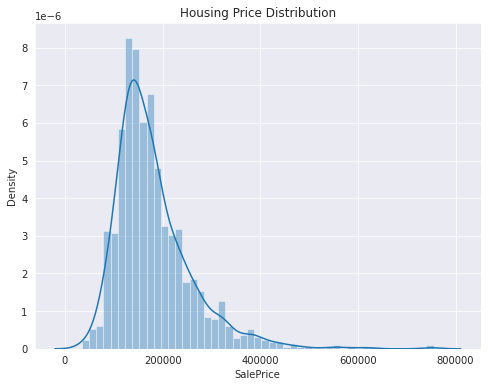

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title=plt.title("Housing Price Distribution")


In [20]:
print("skewness:",y.skew())
print("Kurtiosis:",y.kurt())

skewness: 1.8828757597682129
Kurtiosis: 6.536281860064529


**Top numerical features highly correlated with SalePrice**

In [21]:
corr_mat=train_data.corr().SalePrice.sort_values(ascending=False)

In [22]:
corr_mat.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
estimator=LinearRegression()
rfe=RFE(estimator,n_features_to_select=10,step=1)
selector=rfe.fit(X_train.fillna(0).select_dtypes(exclude='object'),y)
selectedFeatures=list(X.select_dtypes(exclude='object').columns[selector.support_])

In [25]:
selectedFeatures

['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

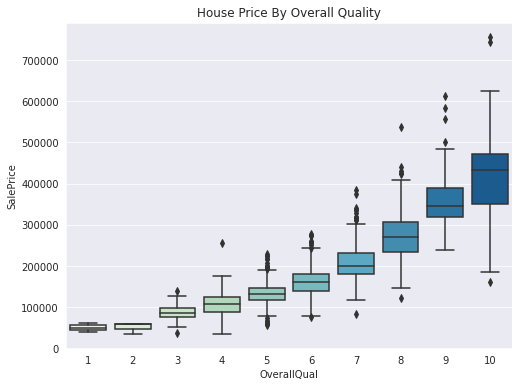

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data,palette='GnBu')
title=plt.title('House Price By Overall Quality')

Correlation:  0.7086244776126515


<Figure size 432x432 with 0 Axes>

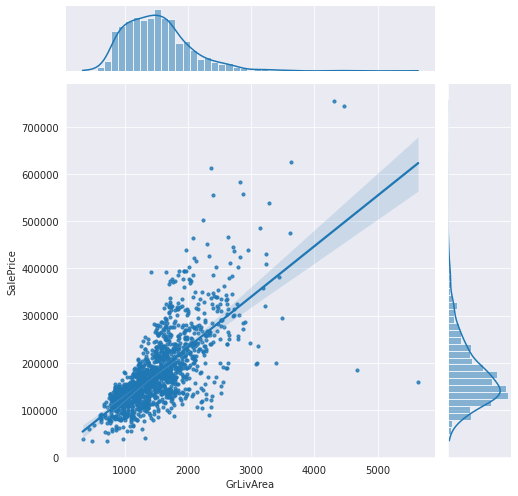

In [27]:

def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", train_data[[variables[0],
                                       variables[1]]].corr().iloc[1,0])
    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(train_data[variables[0]],
                  train_data[variables[1]],
                  kind='reg',
                  height=7,
                  scatter_kws={'s': 10},
                  marginal_kws={'kde': True})


plotCorrelation(['GrLivArea', 'SalePrice'])
   


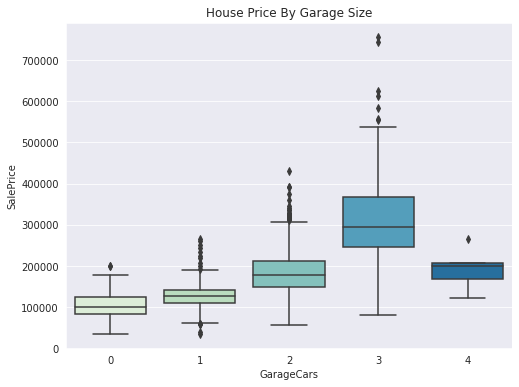

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='GarageCars',y='SalePrice',data=train_data,palette='GnBu')
title=plt.title('House Price By Garage Size')

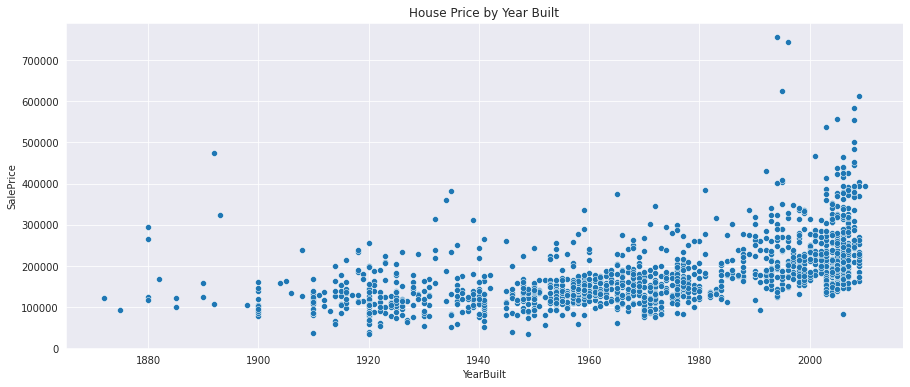

In [29]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

In [30]:
def visualizeCatFeature(feature):
    featOrder=train_data.groupby([feature]).median().SalePrice.sort_values(ascending=False).index
    sns.boxplot(x=feature,y='SalePrice',data=train_data,order=featOrder,palette='GnBu_r')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NridgHt'),
  Text(1, 0, 'NoRidge'),
  Text(2, 0, 'StoneBr'),
  Text(3, 0, 'Timber'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'Veenker'),
  Text(6, 0, 'Crawfor'),
  Text(7, 0, 'ClearCr'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Blmngtn'),
  Text(10, 0, 'NWAmes'),
  Text(11, 0, 'Gilbert'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'Mitchel'),
  Text(14, 0, 'NPkVill'),
  Text(15, 0, 'NAmes'),
  Text(16, 0, 'SWISU'),
  Text(17, 0, 'Blueste'),
  Text(18, 0, 'Sawyer'),
  Text(19, 0, 'BrkSide'),
  Text(20, 0, 'Edwards'),
  Text(21, 0, 'OldTown'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'IDOTRR'),
  Text(24, 0, 'MeadowV')])

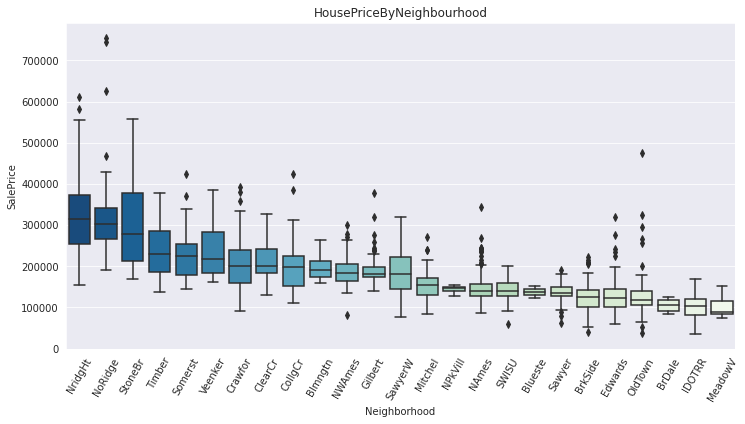

In [31]:
plt.figure(figsize=(12,6))
visualizeCatFeature('Neighborhood')
title=plt.title('HousePriceByNeighbourhood')
plt.xticks(rotation=60)

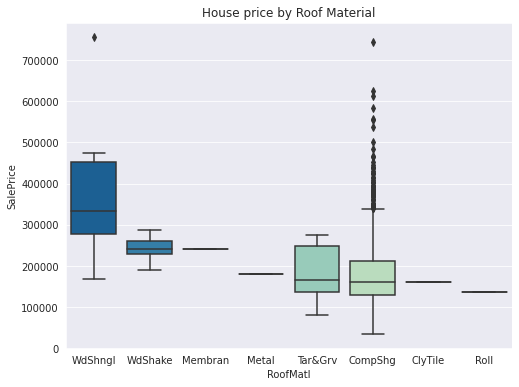

In [32]:
plt.figure(figsize=(8,6))
visualizeCatFeature('RoofMatl')
title=plt.title('House price by Roof Material')

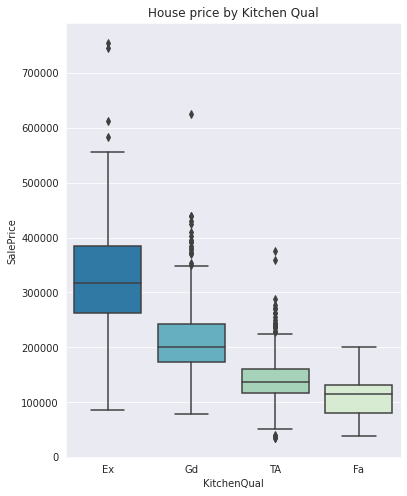

In [33]:
plt.figure(figsize=(6,8))
visualizeCatFeature('KitchenQual')
title=plt.title('House price by Kitchen Qual')

**CORRELATIONS**

Text(0.5, 1.0, 'Correlation Heatmap')

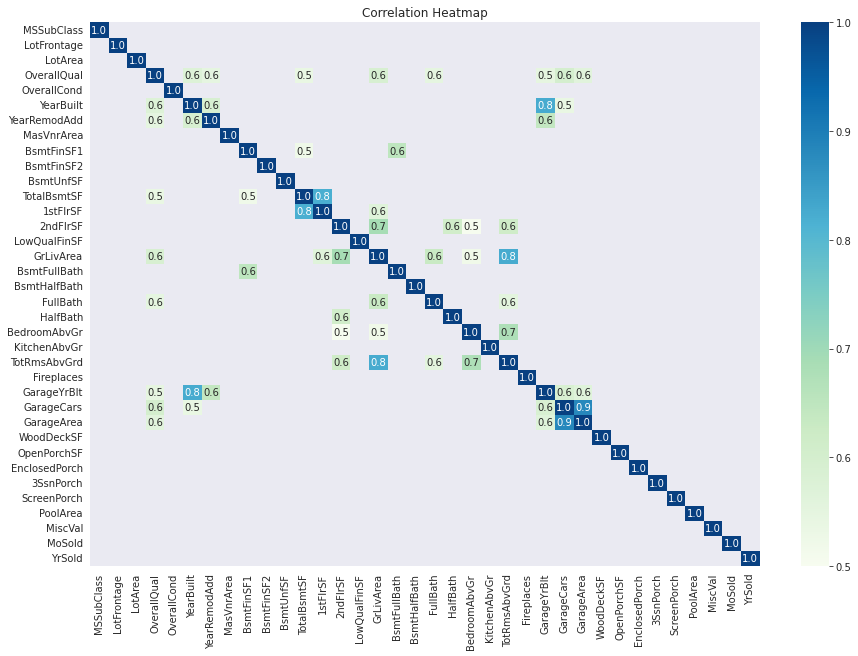

In [34]:
corr_mat=train_data.iloc[:,:-1].corr()
high_corr_mat=corr_mat[abs(corr_mat)>=0.5]
plt.figure(figsize=(15,10))
sns.heatmap(high_corr_mat,annot=True,fmt='.1f',cmap='GnBu',vmin=0.5,vmax=1)
plt.title('Correlation Heatmap')

missing_data_count=X.isnull().sum()
missing_data_percent=X.isnull().sum()/len(X)*100
missing_data=pd.DataFrame({'Count':missing_data_count,'Percent':missing_data_percent})


**MISSING VALUES**

In [35]:
missing_data_count=X.isnull().sum()
missing_data_percent=X.isnull().sum()/len(X)*100
missing_data=pd.DataFrame({'Count':missing_data_count,
                           'Percent':missing_data_percent})
missing_data=missing_data[missing_data['Count']>0]
missing_data.sort_values(by='Count',ascending=False,inplace=True)
missing_data.shape[0]

34

Text(0.5, 1.0, 'Missing Values')

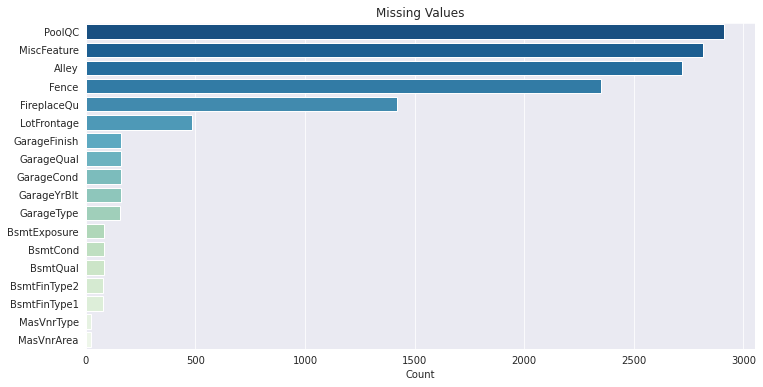

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(y=missing_data.head(18).index,x=missing_data.head(18).Count,palette='GnBu_r')
plt.title('Missing Values')

In [37]:
from sklearn.impute import SimpleImputer
#Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
X[group_1] = X[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

X[group_2] = X[group_2].fillna(0)

# Group 3:
group_3a = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]
imputer = SimpleImputer(strategy='most_frequent')
X[group_3a] = pd.DataFrame(imputer.fit_transform(X[group_3a]), index=X.index)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

In [38]:
sum(X.isnull().sum())

0

**WE WILL CHECK THE OUTLIERS**

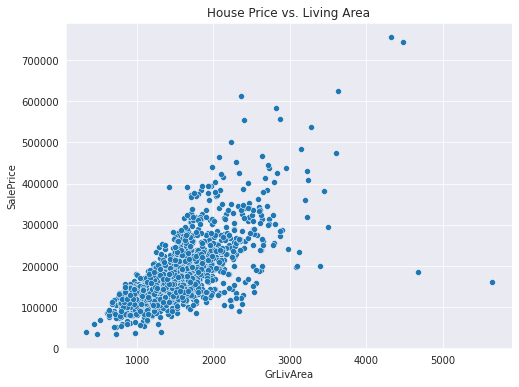

In [39]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('House Price vs. Living Area')

In [40]:
outlier_index = train_data[(train_data.GrLivArea > 4000)
                           & (train_data.SalePrice < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

In [41]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
X['houseAge'] = X.YrSold - X.YearBuilt
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ordinal categorical columns
label_encoding_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

**Numerical to Categorical Variables**

In [ ]:
to_factor_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_factor_cols:
    X[col] = X[col].apply(str)

In [1]:
from scipy import stats
from scipy.stats import norm
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()
    


In [ ]:

normality_plot(y)

**To fix skewness of y we will use log(1+y) because log0 is not defined**

In [ ]:
y = np.log(1 + y)

**We will find skewed features in our original train dataset**

In [ ]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

In [ ]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    X[col] = np.log(1 + X[col])

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

**ONE HOT ENCODING**

In [ ]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

**NOW WE WILL SPLIT THE TRAIN AND TEST DATA AGAIN**

In [ ]:
ntest = len(test_data)
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

**I will write a function to get the Root Mean Squared Logarithmic Error (RMSLE) for my models using cross-validation. There is one note here: because I have transformed the target variable to log(1+y) , the Mean Squared Error for log(1+y) is the Mean Squared Logarithmic Error for SalePrice.**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5


def getRMSLE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmse = np.sqrt(-cross_val_score(
        model, X_train, y, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()

**Applying regression models**

**RIDGE REGRESSION**

In [ ]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

In [ ]:
ridge = Ridge(alpha=22.9)

**LASSO REGRESSION**

In [ ]:
lambda_list = list(np.linspace(0.0006, 0.0007, 11))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [ ]:
lasso = Lasso(alpha=0.00065, max_iter=100000)

**XGBOOST**

In [ ]:
from xgboost import XGBRegressor


In [ ]:
xgb = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   silent=1,
                   random_state=7,
                   n_jobs=2)
getRMSLE(xgb)

**LightGBM**

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)
getRMSLE(lgb)

**AVERAGING MODEL**

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [ ]:
avg_model = AveragingModel(models=(ridge, lasso, xgb, lgb))
getRMSLE(avg_model)

**The RMSLE score of the averaging model is much better than any of base models. I will use this model as my final model. In the last step, I will train my final model on the whole training data, make predictions from the test data and save my output.**

In [ ]:
my_model = avg_model
my_model.fit(X_train, y)
predictions = my_model.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)